In [20]:
import torch
import train
import model
import prediction
import numpy as np
import csvLoader as cl
import visualizer as vs
import dataLoader as dl
import dataAugmentation as da
import torch.optim as optim
from torchvision import models
from torch.utils.data.sampler import SubsetRandomSampler, SequentialSampler

GPU mode: True
Len of train csv: 7049
All Valid Shape - (2140, 31)
Auto Fill Shape - (7049, 31)
Missing Only Shape - (4909, 31)
Loading Dataset...
Randomly Visualizing...


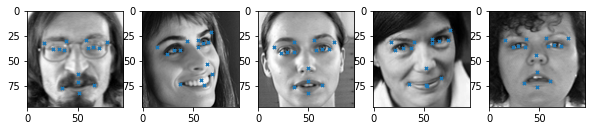

In [2]:
TRAIN_CSV_PATH = 'facial-keypoints-detection/training/training.csv'
TEST_CSV_PATH = 'facial-keypoints-detection/test/test.csv'

USE_GPU, device = train.check_GPU()
print('GPU mode: {}'.format(USE_GPU))

train_csv = cl.load_csv(TRAIN_CSV_PATH)

print(f'Len of train csv: {len(np.array(train_csv.Image))}')
csv_allValid, csv_autoFill, csv_missingOnly = cl.clean_csv(train_csv)

print('Loading Dataset...')
autoFill_dataset = dl.FacialKptsDataSet(csv_allValid)
print('Randomly Visualizing...')
vs.rand_vis_dataset(autoFill_dataset, 5)

In [3]:
autoFillTrain, autoFillVal = dl.getTrainValidationDataSet(csv_allValid, 0.85)
print('Loading training/val set...')
train_dataset = dl.FacialKptsDataSet(autoFillTrain)
val_dataset = dl.FacialKptsDataSet(autoFillVal)

Loading training/val set...


Visualizing dataset #0...


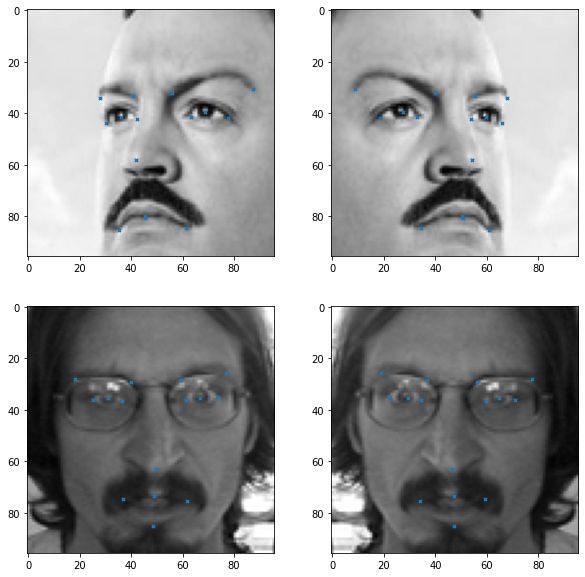

Size of Original set - 2140
Size of Mirror Aug sets list - 1


In [4]:
# Mirror
mirror_set = da.create_augs_from_transform(autoFillTrain, da.mirror, params=[None])
vs.rand_vis_compare_orig_augset(train_dataset, mirror_set, 2)
print('Size of Original set - {}\nSize of Mirror Aug sets list - {}'.format(len(autoFill_dataset), len(mirror_set)))

Visualizing dataset #0...
Visualizing dataset #1...


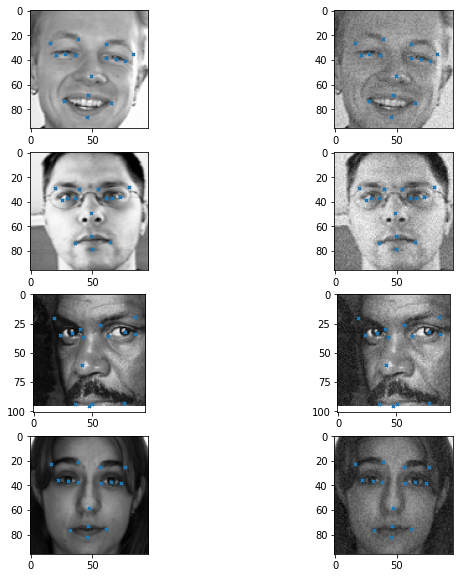

In [5]:
# Add Noise
noise_set = da.create_augs_from_transform(autoFillTrain, da.add_noise, params=[0.1, 0.08])
vs.rand_vis_compare_orig_augset(train_dataset, noise_set, 2)

Visualizing dataset #0...
Visualizing dataset #1...


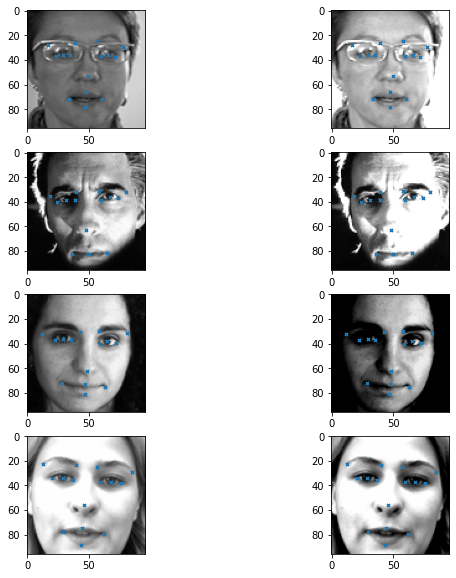

In [6]:
# Brightness Trim
brightTrim_set = da.create_augs_from_transform(autoFillTrain, da.brightness_trim, params=[0.7, -0.7])
vs.rand_vis_compare_orig_augset(train_dataset, brightTrim_set, 2)

Visualizing dataset #0...
Visualizing dataset #1...
Visualizing dataset #2...
Visualizing dataset #3...


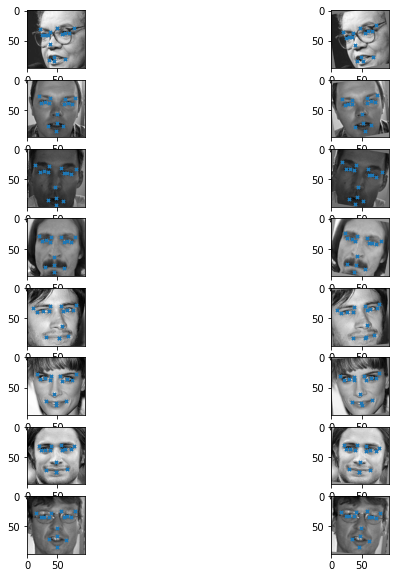

In [7]:
# Rotation
rotation_set = da.create_augs_from_transform(autoFillTrain, da.rotate, params=[10, -10, 5, -5])
vs.rand_vis_compare_orig_augset(train_dataset, rotation_set, 2)

In [8]:
all_datasets = []

all_datasets += [train_dataset]
all_datasets += mirror_set
all_datasets += noise_set
all_datasets += brightTrim_set
all_datasets += rotation_set

print('Num of datasets after augmentation: {}'.format(len(all_datasets)))

print('Concatenating all sets...')
train_datasets = torch.utils.data.ConcatDataset(all_datasets)
print('Num of samples after concatenation: {}'.format(len(train_datasets)))

Num of datasets after augmentation: 10
Concatenating all sets...
Num of samples after concatenation: 18190


In [9]:
# Init samplers and loaders
train_sampler = SubsetRandomSampler(range(len(train_datasets)))
val_sampler = SubsetRandomSampler(range(len(val_dataset)))

train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=128, sampler=train_sampler, num_workers=2, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, sampler=val_sampler, num_workers=2, pin_memory=True)

print('Size of training loader batches: {}\nSize of validation loader batches: {}'.format(len(train_loader), len(val_loader)))

Size of training loader batches: 143
Size of validation loader batches: 3


In [10]:
# Nets
fc_model = model.FullyConnectedNet()
resnet32_model = model.resnet32()
resnet47_model = model.resnet47()

Using Device - cuda
Starting Epoch: 1/50 
Train Mode Set to True.
Starting the first batch...
Iteration - 1:  Average Training Loss: 50.9161
Iteration - 31:  Average Training Loss: 17.8072
Iteration - 61:  Average Training Loss: 10.8648
Iteration - 91:  Average Training Loss: 8.3926
Iteration - 121:  Average Training Loss: 6.9937
Evaluating..
Average Training Loss: 6.2764 Average Val Loss: 6.5962
Improvement Detected, Saving to ./best_model.pt
Starting Epoch: 2/50 
Train Mode Set to True.
Starting the first batch...
Iteration - 1:  Average Training Loss: 2.3991
Iteration - 31:  Average Training Loss: 2.1489
Iteration - 61:  Average Training Loss: 2.0498
Iteration - 91:  Average Training Loss: 1.9747
Iteration - 121:  Average Training Loss: 1.9099
Evaluating..
Average Training Loss: 1.8700 Average Val Loss: 3.6419
Improvement Detected, Saving to ./best_model.pt
Starting Epoch: 3/50 
Train Mode Set to True.
Starting the first batch...
Iteration - 1:  Average Training Loss: 1.7151
Iterati

Iteration - 91:  Average Training Loss: 0.9565
Iteration - 121:  Average Training Loss: 0.9416
Evaluating..
Epoch 00021: reducing learning rate of group 0 to 1.0000e-04.
Average Training Loss: 0.9354 Average Val Loss: 1.2923
Starting Epoch: 22/50 
Train Mode Set to True.
Starting the first batch...
Iteration - 1:  Average Training Loss: 1.0823
Iteration - 31:  Average Training Loss: 0.7866
Iteration - 61:  Average Training Loss: 0.7428
Iteration - 91:  Average Training Loss: 0.7206
Iteration - 121:  Average Training Loss: 0.7063
Evaluating..
Average Training Loss: 0.7037 Average Val Loss: 1.0078
Improvement Detected, Saving to ./best_model.pt
Starting Epoch: 23/50 
Train Mode Set to True.
Starting the first batch...
Iteration - 1:  Average Training Loss: 0.6101
Iteration - 31:  Average Training Loss: 0.6302
Iteration - 61:  Average Training Loss: 0.6298
Iteration - 91:  Average Training Loss: 0.6356
Iteration - 121:  Average Training Loss: 0.6306
Evaluating..
Average Training Loss: 0.6

Iteration - 31:  Average Training Loss: 0.4593
Iteration - 61:  Average Training Loss: 0.4525
Iteration - 91:  Average Training Loss: 0.4598
Iteration - 121:  Average Training Loss: 0.4596
Evaluating..
Average Training Loss: 0.4608 Average Val Loss: 0.9876
Starting Epoch: 43/50 
Train Mode Set to True.
Starting the first batch...
Iteration - 1:  Average Training Loss: 0.4248
Iteration - 31:  Average Training Loss: 0.4495
Iteration - 61:  Average Training Loss: 0.4565
Iteration - 91:  Average Training Loss: 0.4514
Iteration - 121:  Average Training Loss: 0.4540
Evaluating..
Average Training Loss: 0.4561 Average Val Loss: 1.0082
Starting Epoch: 44/50 
Train Mode Set to True.
Starting the first batch...
Iteration - 1:  Average Training Loss: 0.5698
Iteration - 31:  Average Training Loss: 0.4650
Iteration - 61:  Average Training Loss: 0.4595
Iteration - 91:  Average Training Loss: 0.4601
Iteration - 121:  Average Training Loss: 0.4615
Evaluating..
Average Training Loss: 0.4644 Average Val 

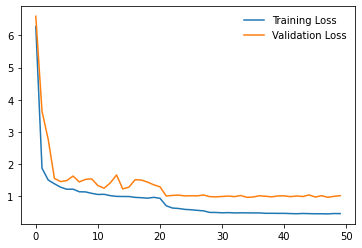

In [13]:
# Optimizer and scheduler Inits
lr = 1e-3

import torch.nn as nn
from torchvision import models

fc_model = model.FullyConnectedNet()
resnet32_model = model.resnet32()
resnet47_model = model.resnet47()
resnet50 = models.resnet50(num_classes=30)

resnet50.inplanes = 96
resnet50.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

use_model = resnet50

optimizer = optim.Adam(use_model.parameters(), lr=lr, weight_decay=5e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=5)
train.train_model(use_model, optimizer, train_loader, val_loader, scheduler=scheduler, loss_fn=train.RMSELoss, to_mask=False, epochs=50)

In [15]:
test_csv = cl.load_csv(TEST_CSV_PATH)
csv_allValid, csv_autoFill, csv_missingOnly = cl.clean_csv(test_csv)

test_dataset = dl.FacialKptsDataSet(csv_allValid)
test_sampler =  SubsetRandomSampler(range(len(test_dataset)))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, sampler=test_sampler)

All Valid Shape - (1783, 2)
Auto Fill Shape - (1783, 2)
Missing Only Shape - (0, 2)


In [16]:
current_trained = './best_model.pt'
model_path = './best_model_fc_net.pt'
resnet_model_path = './best_model_resnet_50_0.6.pt'

In [17]:
resnet50 = models.resnet50(num_classes=30)
resnet50.inplanes = 96
resnet50.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)

fc_net = model.FullyConnectedNet()

In [21]:
fc_model= prediction.loadModel(model_path, fc_net)
resnet_model = prediction.loadModel(resnet_model_path, resnet50)

Testing Set:
Red o for fc net and green x for resnet: 


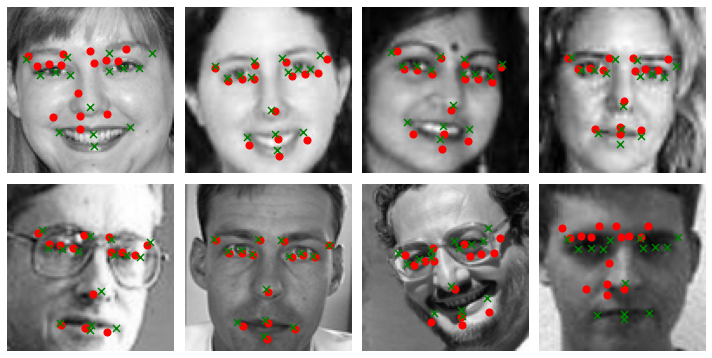

tensor([[66.3312, 34.4320, 27.3041, 37.1758, 58.1188, 36.6163, 75.3735, 34.4801,
         35.9324, 38.5374, 18.3110, 38.6011, 57.9899, 25.9193, 83.0320, 25.7513,
         33.9280, 28.1960, 10.5714, 29.7372, 46.9621, 57.3592, 70.0577, 68.6886,
         29.4835, 71.5490, 48.7357, 72.4933, 49.2927, 79.7525],
        [65.0901, 35.1291, 31.6037, 38.8542, 58.9396, 37.1025, 72.0050, 35.2125,
         37.6659, 39.6814, 24.2869, 40.4965, 55.4676, 28.7999, 77.7362, 26.9298,
         39.4338, 30.4886, 16.9918, 33.2948, 49.6537, 58.9716, 67.6700, 71.6851,
         35.3269, 74.1780, 51.5846, 72.8220, 52.6425, 82.1647],
        [65.0147, 37.8636, 31.2730, 33.5643, 57.8503, 38.3742, 73.3060, 39.5123,
         39.5031, 35.8279, 22.6576, 33.4809, 58.5042, 29.3274, 80.4620, 32.3450,
         44.8268, 27.9586, 16.4439, 25.2589, 51.8284, 56.0649, 61.1522, 70.1171,
         25.3293, 65.8675, 46.0548, 68.3634, 44.5487, 75.8735],
        [64.3858, 38.3098, 30.9521, 35.8402, 57.6658, 39.0371, 71.6062, 39.5811

In [22]:
image, _ = next(iter(test_loader))
pred = prediction.predict(fc_model, image, None, vis=False)
print('Testing Set:\nRed o for fc net and green x for resnet: ')
prediction.predict(resnet_model, image, None, comp_kpts=pred)

In [23]:
print('All Valid Set:')
image, kpts = next(iter(val_allValid_loader))
print('Resnet Predictions: ')
prediction.predict(resnet_model, image, kpts)

print('FC Net Predictions: ')
prediction.predict(fc_model, image, kpts)

All Valid Set:


NameError: name 'val_allValid_loader' is not defined